<a href="https://colab.research.google.com/github/Byeon-MJ/DL_Computer_Vision/blob/main/Face_Recognition_Landmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Landmark
- 이미 학습된 dlib 모델을 이용하여 얼굴의 윤곽을 인식
- 얼굴에서 68개의 facial landmark를 찾아낼 수 있다

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!git clone https://github.com/davisking/dlib-models.git

Cloning into 'dlib-models'...
remote: Enumerating objects: 186, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 186 (delta 17), reused 11 (delta 1), pack-reused 154
Receiving objects: 100% (186/186), 408.51 MiB | 23.35 MiB/s, done.
Resolving deltas: 100% (89/89), done.


In [3]:
# 압축 파일 풀기
!bzip2 -d /content/dlib-models/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d /content/dlib-models/shape_predictor_5_face_landmarks.dat.bz2

In [4]:
# 필요한 파일만 복사
!cp /content/dlib-models/shape_predictor_68_face_landmarks.dat /content/gdrive/MyDrive/CV/Face\ Landmark
!cp /content/dlib-models/shape_predictor_5_face_landmarks.dat /content/gdrive/MyDrive/CV/Face\ Landmark

In [5]:
# 다운받은 파일 제거
!rm -r dlib-models

In [6]:
# 모듈 임포트
import numpy as np
import dlib
import cv2
from google.colab.patches import cv2_imshow

In [7]:
# 68개 facial landmark 정의
RIGHT_EYE = list(range(36, 42))
LEFT_EYE = list(range(42, 48))
EYES = list(range(36, 48))
MOUTH = list(range(48, 68))
NOSE = list(range(48, 68))
EYEBROWS = list(range(17, 27))
JAWLINE = list(range(1, 17))
ALL = list(range(0, 68))

In [8]:
# 학습된 dlib 모델 로드
predictor_file = '/content/gdrive/MyDrive/CV/Face Landmark/shape_predictor_68_face_landmarks.dat'

# 원본 이미지 파일
image_file = '/content/gdrive/MyDrive/CV/Face Landmark/face2.jpg'

In [9]:
# 얼굴 감지하는 detector 정의
detector = dlib.get_frontal_face_detector()

# facial landmark를 찾아주는 predictor 정의
predictor = dlib.shape_predictor(predictor_file)

In [10]:
# 원본 이미지 파일 로드
image = cv2.imread(image_file)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# detector 에 의해 얼굴 감지
rects = detector(gray, 1)
print('Number of faces detected: {}'.format(len(rects)))
print(rects)

Number of faces detected: 1
rectangles[[(118, 204) (504, 590)]]


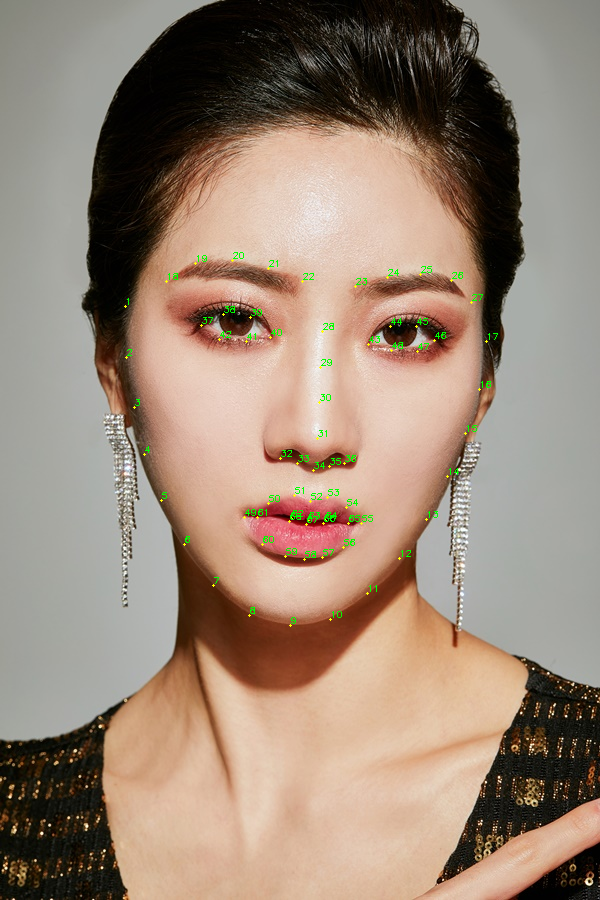

In [11]:
for (i, rect) in enumerate(rects):
    # predictor에 의해서 감지된 landmark point를 x, y 좌표로 계산
    points = np.matrix([[p.x, p.y] for p in predictor(gray, rect).parts()])
    show_parts = points[ALL]

    for (i, point) in enumerate(show_parts):
        x = point[0, 0] # x 좌표값
        y = point[0, 1] # y 좌표값
        cv2.circle(image, (x, y), 1, (0, 255, 255), -1) # 각 좌표에 점 찍기
        cv2.putText(image, f'{i+1}', (x, y - 2), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 255, 0), 1) # 점에 숫자 표시

cv2_imshow(image)